In [1]:
from google.cloud import bigquery

In [2]:
client = bigquery.Client()
dataset_ref = client.dataset('crypto_bitcoin', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

In [3]:
table_list = list(client.list_tables(dataset))
for i in table_list:
    print(i.table_id)

blocks
inputs
outputs
transactions


In [4]:
table_ref = dataset_ref.table("transactions")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,aaac8b454e079237b8509c422b8a0ebd95e3eca5944b95...,137,137,1,0,000000000000000000d6cdda66edb65e8969566ca65fe3...,484015,2017-09-07 13:43:30+00:00,2017-09-01,0,1,None,1266641901,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,8505c4277a8da0450cb6fd345b409a87218e09987c7e92...,193,166,1,0,000000000000000000427219aa8b931acb167f582e9b9c...,485083,2017-09-13 19:30:26+00:00,2017-09-01,0,2,None,1367011480,True,0,[],"[{'index': 0, 'script_asm': 'OP_HASH160 6dffc0..."
2,d1a2060a08e8cd54480de8a0aac761b8667c175a7de08e...,213,186,1,0,000000000000000000d5ed15beb3085719e8f1b95f2924...,485005,2017-09-13 10:25:46+00:00,2017-09-01,0,2,None,1255484937,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,2fba35aaba056d4028d512c0fb134ff41d2d5c504fc7a1...,213,186,1,0,0000000000000000009fd230518a5b3d50ebcd5120a844...,486934,2017-09-25 17:28:19+00:00,2017-09-01,0,2,None,1431309437,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,630af30aa1ade3de86df071d35b6eb28e0590cf7e0bcaa...,217,190,1,0,000000000000000000841e1fa84e8e5abdfa000936524c...,483854,2017-09-06 16:06:09+00:00,2017-09-01,0,2,None,1530785512,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


In [6]:
#table.schema

In [7]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)

def get_query(my_query):
    query_job = client.query(my_query, job_config=safe_config)
    transactions_by_date = query_job.to_dataframe()
    return transactions_by_date

In [12]:
query1 = """
        WITH time AS
        (
            SELECT DATE(block_timestamp) AS trans_date
            FROM `bigquery-public-data.crypto_bitcoin.transactions`
        )
        SELECT trans_date, COUNT(1) AS transactions
        FROM time
        GROUP BY trans_date
        ORDER BY trans_date
        """

my_ans = get_query(query1)
my_ans.head()

,trans_date,transactions
0,2009-01-03,1
1,2009-01-09,14
2,2009-01-10,61
3,2009-01-11,93
4,2009-01-12,101


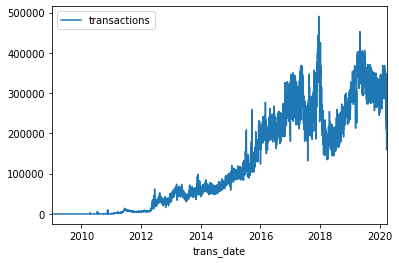

In [10]:
my_ans.set_index("trans_date").plot()

## Exercise

In [13]:
client = bigquery.Client()
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

In [14]:
table_list =list(client.list_tables(dataset))
for i in table_list:
    print(i.table_id)

taxi_trips


In [15]:
table_ref = dataset_ref.table("taxi_trips")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,aa97e0c41406353dec00f7743aed35b739528a35,d88fbc7bc71b56a99d9bb8498ae49e071a50699ba66aba...,2013-06-17 12:15:00+00:00,2013-06-17 12:15:00+00:00,NaN,0.0,None,None,None,None,...,0.0,18.30,Credit Card,Chicago Elite Cab Corp.,None,None,None,None,None,None
1,8ae1e34ba09e91621528852f7c200d8ce15268d1,6e0a0360a9107f3cc0064a80f49f33a7f53e8aa6232d66...,2013-06-16 04:15:00+00:00,2013-06-16 04:15:00+00:00,660.0,0.0,None,None,None,None,...,0.0,15.25,No Charge,Taxi Affiliation Services,None,None,None,None,None,None
2,a1022dad043c86d56cc8eea5c6a1f49f90a13b8b,f7f256ad067dd0ea9223b394b4a802ccf1ede42fe18951...,2013-06-14 13:00:00+00:00,2013-06-14 13:00:00+00:00,NaN,0.0,None,None,None,None,...,0.0,8.25,Credit Card,Taxi Affiliation Services,None,None,None,None,None,None
3,bcab8040b4d99dcfbde88881e436e399d40b6737,101852f8d24207a0fbe76e94171aaa995b94a2d71e995e...,2013-06-14 17:15:00+00:00,2013-06-14 17:15:00+00:00,0.0,0.0,None,None,None,None,...,0.0,44.65,Credit Card,Taxi Affiliation Services,None,None,None,None,None,None
4,a4e3347558fe61509e35115aa576f1c7e187587a,21c5d83c2cb73035c6c4d35da452ff1714aff86f5efb32...,2013-08-23 23:30:00+00:00,2013-08-23 23:30:00+00:00,360.0,1.3,None,None,None,None,...,0.0,7.05,Credit Card,Choice Taxi Association,None,None,None,None,None,None
